<a href="https://colab.research.google.com/github/JhpAb/data354_Hiring_Challenge/blob/main/CyberTrend_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importation des librairies**

In [1]:
!pip install google-search-results

  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32009 sha256=41c0b38427193b890bfc60d870ed32cb87f9182d5565425b06138b6293529389
  Stored in directory: /root/.cache/pip/wheels/6e/42/3e/aeb691b02cb7175ec70e2da04b5658d4739d2b41e5f73cd06f
Successfully built google-search-results


# **Clé API SerpAPI**

In [2]:
from datetime import datetime, timedelta
from serpapi import GoogleSearch

SERPAPI_KEY = "22544547d721abc6f0c4e4990994f82562449be47fbfa837507d3b2f6231d9c0"

def get_linkedin_posts_without_linkedin(query, num_results=100):
    """Récupère les posts LinkedIn pertinents des 3 derniers mois sans utiliser LinkedIn API."""
    all_posts = []
    current_page = 1
    results_per_page = 50  # Optimisation pour récupérer plus de résultats par requête

    # Définition de la plage de dates (3 mois en arrière)
    end_date = datetime.today()
    start_date = end_date - timedelta(days=90)

    while len(all_posts) < num_results:
        params = {
            "engine": "google",
            "q": f"{query} site:linkedin.com/posts",
            "num": results_per_page,
            "api_key": SERPAPI_KEY,
            "start": (current_page - 1) * results_per_page  # Pagination
        }

        try:
            search = GoogleSearch(params)  # Utilisation du bon nom de classe
            results = search.get_dict()

            if "error" in results:
                print("🚨 Erreur SerpAPI :", results["error"])
                break  # Arrêter en cas d'erreur API

            organic_results = results.get("organic_results", [])

            if not organic_results:
                print("❌ Aucun résultat trouvé, arrêt du script.")
                break  # Arrêter si plus de résultats

            for result in organic_results:
                title = result.get("title", "")
                link = result.get("link", "")
                snippet = result.get("snippet", "")
                date_str = result.get("date", "")  # Date du post
                author = result.get("source", "Auteur inconnu")  # On prend l'auteur même si le profil LinkedIn n'est pas disponible

                # Conversion de la date
                try:
                    date = datetime.strptime(date_str, "%b %d, %Y")  # Format de date typique
                except (ValueError, TypeError):
                    date = None  # Si la date est illisible, on prend le post quand même

                # Vérification de la plage de dates
                if date is None or (start_date <= date <= end_date):
                    all_posts.append({
                        "Date": date.strftime("%Y-%m-%d") if date else "Date inconnue",
                        "Author": author,
                        "Content": snippet,
                        "Keywords": query,
                        "Link": link
                    })

            if len(all_posts) >= num_results:
                break  # Stop si on a assez de résultats

            current_page += 1  # Passer à la page suivante

        except Exception as e:
            print("⚠️ Erreur lors de la requête :", e)
            break  # Stopper le script en cas d'erreur critique

    print(f"✅ Nombre total de posts récupérés : {len(all_posts)}")
    return all_posts[:num_results]

# Exemple d'utilisation
posts = get_linkedin_posts_without_linkedin("Cyber security", num_results=100)

# Affichage des 5 premiers résultats
for post in posts[:5]:
    print(post)  # Affichage de chaque post


✅ Nombre total de posts récupérés : 149
{'Date': 'Date inconnue', 'Author': 'LinkedIn · Luke Kiely', 'Content': "Cyber Security isn't solely the domain of tech experts; it's for anyone who values safety. If you think otherwise, it's time for a reality ...", 'Keywords': 'Cyber security', 'Link': 'https://www.linkedin.com/posts/luke-k_cyber-security-isnt-solely-the-domain-of-activity-7253024572013211648-Oxcl'}
{'Date': 'Date inconnue', 'Author': 'LinkedIn · Iain Dickson', 'Content': 'Did cyber security get old, settle down, have kids, and a normal 9-5 job? The professionalisation debate has, in my opinion, ...', 'Keywords': 'Cyber security', 'Link': 'https://www.linkedin.com/posts/wan0net_did-cyber-security-get-old-settle-down-activity-7305865981577347072-EcaL'}
{'Date': 'Date inconnue', 'Author': 'LinkedIn · Tim Crothers', 'Content': 'Controls are the primary mechanism we use to safeguard those organizations. Frameworks are tools to weave a tapestry of controls that should, in ...', 'Ke

# **Définition des mots à scrapper**

In [3]:
keywords = [
    "cybersécurité Afrique", "cybercriminalité Afrique", "IA et cybercriminalité", "Cyber Africa Forum",
    "cybermenace entreprise Afrique", "fraude numérique intelligence artificielle Afrique", "Cyber attaque", "Cyber criminel",
    "Désinformation", "Cyber Alerte", "Piraté", "mots de passe faibles", "ANSSI - Agence nationale de la sécurité des systèmes d'information",
    "Risques cybernétiques et Intelligence Artificielle (IA)", "nouvelles menaces numériques", "Cybermalveillance.gouv.fr", "ANSSI - Côte d'Ivoire"
]

all_posts = []

for keyword in keywords:
    print(f"Scraping des posts pour : {keyword}...")
    posts = get_linkedin_posts_without_linkedin(keyword, num_results=5)  # Assurez-vous que la fonction `get_linkedin_posts` existe
    all_posts.extend(posts)


Scraping des posts pour : cybersécurité Afrique...
✅ Nombre total de posts récupérés : 49
Scraping des posts pour : cybercriminalité Afrique...
✅ Nombre total de posts récupérés : 49
Scraping des posts pour : IA et cybercriminalité...
✅ Nombre total de posts récupérés : 50
Scraping des posts pour : Cyber Africa Forum...
✅ Nombre total de posts récupérés : 49
Scraping des posts pour : cybermenace entreprise Afrique...
✅ Nombre total de posts récupérés : 49
Scraping des posts pour : fraude numérique intelligence artificielle Afrique...
✅ Nombre total de posts récupérés : 49
Scraping des posts pour : Cyber attaque...
✅ Nombre total de posts récupérés : 49
Scraping des posts pour : Cyber criminel...
✅ Nombre total de posts récupérés : 50
Scraping des posts pour : Désinformation...
✅ Nombre total de posts récupérés : 49
Scraping des posts pour : Cyber Alerte...
✅ Nombre total de posts récupérés : 49
Scraping des posts pour : Piraté...
✅ Nombre total de posts récupérés : 49
Scraping des post

# **Création du jeu de données**

In [4]:
import pandas as pd
# Conversion en DataFrame Pandas
df = pd.DataFrame(all_posts)
# Affichage du jd
df

,Date,Author,Content,Keywords,Link
0,Date inconnue,LinkedIn · Bancal Damien,Post de Bancal Damien · Top 100 des acteurs in...,cybersécurité Afrique,https://fr.linkedin.com/posts/bancal-damien_to...
1,Date inconnue,LinkedIn · Africa CyberSecurity Mag,#CyberAgenda ✓Découvrez les événements majeurs...,cybersécurité Afrique,https://fr.linkedin.com/posts/africacybermag_c...
2,Date inconnue,LinkedIn · Clement Domingo,"Même au Congo, pour un panel devant une salle ...",cybersécurité Afrique,https://fr.linkedin.com/posts/clementdomingo_c...
3,Date inconnue,LinkedIn · Amine IDRISS A. KARAMA,Les plus grandes craintes liées à l'espionnage...,cybersécurité Afrique,https://fr.linkedin.com/posts/leadershipdevelo...
4,Date inconnue,LinkedIn · Didier SIMBA,Les talents africains en cybersécurité ! Je ...,cybersécurité Afrique,https://fr.linkedin.com/posts/didier-simba_cyb...
...,...,...,...,...,...
80,Date inconnue,LinkedIn · Africa Trade News,Ivory Coast is in the process of creating a Na...,ANSSI - Côte d'Ivoire,https://www.linkedin.com/posts/africatradenews...
81,Date inconnue,LinkedIn · Edith Brou Bleu,Côte d'Ivoire : l'Agence Nationale de la Sécur...,ANSSI - Côte d'Ivoire,https://fr.linkedin.com/posts/edithbrou_c%C3%B...
82,Date inconnue,LinkedIn,CYBERCRIMINALITÉ ET CYBERDÉFENSE : L'ANSSI ET ...,ANSSI - Côte d'Ivoire,https://fr.linkedin.com/posts/anssi-c%C3%B4te-...
83,Date inconnue,LinkedIn,L'ANSSI CÔTE D'IVOIRE RENFORCE SA COOPÉRATION ...,ANSSI - Côte d'Ivoire,https://fr.linkedin.com/posts/anssi-c%C3%B4te-...


In [5]:
# Suppression dans la colonne 'Author' le mot LinkedIn
df['Author'] = df['Author'].str.replace('LinkedIn · ', '')

# Display the updated DataFrame
df


,Date,Author,Content,Keywords,Link
0,Date inconnue,Bancal Damien,Post de Bancal Damien · Top 100 des acteurs in...,cybersécurité Afrique,https://fr.linkedin.com/posts/bancal-damien_to...
1,Date inconnue,Africa CyberSecurity Mag,#CyberAgenda ✓Découvrez les événements majeurs...,cybersécurité Afrique,https://fr.linkedin.com/posts/africacybermag_c...
2,Date inconnue,Clement Domingo,"Même au Congo, pour un panel devant une salle ...",cybersécurité Afrique,https://fr.linkedin.com/posts/clementdomingo_c...
3,Date inconnue,Amine IDRISS A. KARAMA,Les plus grandes craintes liées à l'espionnage...,cybersécurité Afrique,https://fr.linkedin.com/posts/leadershipdevelo...
4,Date inconnue,Didier SIMBA,Les talents africains en cybersécurité ! Je ...,cybersécurité Afrique,https://fr.linkedin.com/posts/didier-simba_cyb...
...,...,...,...,...,...
80,Date inconnue,Africa Trade News,Ivory Coast is in the process of creating a Na...,ANSSI - Côte d'Ivoire,https://www.linkedin.com/posts/africatradenews...
81,Date inconnue,Edith Brou Bleu,Côte d'Ivoire : l'Agence Nationale de la Sécur...,ANSSI - Côte d'Ivoire,https://fr.linkedin.com/posts/edithbrou_c%C3%B...
82,Date inconnue,LinkedIn,CYBERCRIMINALITÉ ET CYBERDÉFENSE : L'ANSSI ET ...,ANSSI - Côte d'Ivoire,https://fr.linkedin.com/posts/anssi-c%C3%B4te-...
83,Date inconnue,LinkedIn,L'ANSSI CÔTE D'IVOIRE RENFORCE SA COOPÉRATION ...,ANSSI - Côte d'Ivoire,https://fr.linkedin.com/posts/anssi-c%C3%B4te-...


In [28]:
# Définir le chemin du fichier
csv_file = "/content/df.csv"

# Enregistrer en CSV
df.to_csv(csv_file, encoding="utf-8-sig", index=False)

# Vérifier si le fichier est bien enregistré
import os
print("Fichier présent ?", os.path.exists(csv_file))


Fichier présent ? True


In [29]:
from google.colab import files

# Télécharger le fichier
files.download("/content/df.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Statistique descriptive**

In [6]:
# prompt: génère le code qui me compte le nombre de lignes du jeu de données

# Assuming your DataFrame is named 'df'
num_rows = len(df)
print("Le nombre de lignes dans le jeu de données est :", num_rows)


Le nombre de lignes dans le jeu de données est : 85


# **Statitique descriptive univariée des auteurs**

In [7]:
# Tableau statistique des auteurs uniques rangés dans l'ordre  croissant

import pandas as pd

# Calculer le nombre d'occurrences de chaque auteur
author_counts = df['Author'].value_counts()

# Créer un nouveau DataFrame avec les auteurs uniques et leur nombre d'occurrences
author_stats = pd.DataFrame({'Author': author_counts.index, 'Count': author_counts.values})

# Trier le DataFrame par ordre croissant du nombre d'occurrences
author_stats = author_stats.sort_values('Count')

# Afficher le tableau statistique des auteurs uniques dans l'ordre croissant
author_stats = author_stats.rename(columns={'count': 'Nombre de publications'})
author_stats


,Author,Count
12,Didier SIMBA,1
13,Africa CyberSecurity Mag,1
14,Top Tech,1
15,SQUAD Conseil et Expertises,1
27,Michel Quinones,1
26,Trapster,1
25,Benjamin Scrive,1
24,"Maximilien F. KPODJEDO, Ph. D.",1
23,Veronique Corda,1
22,Haïfa DAOUD,1


Number of unique authors: 54


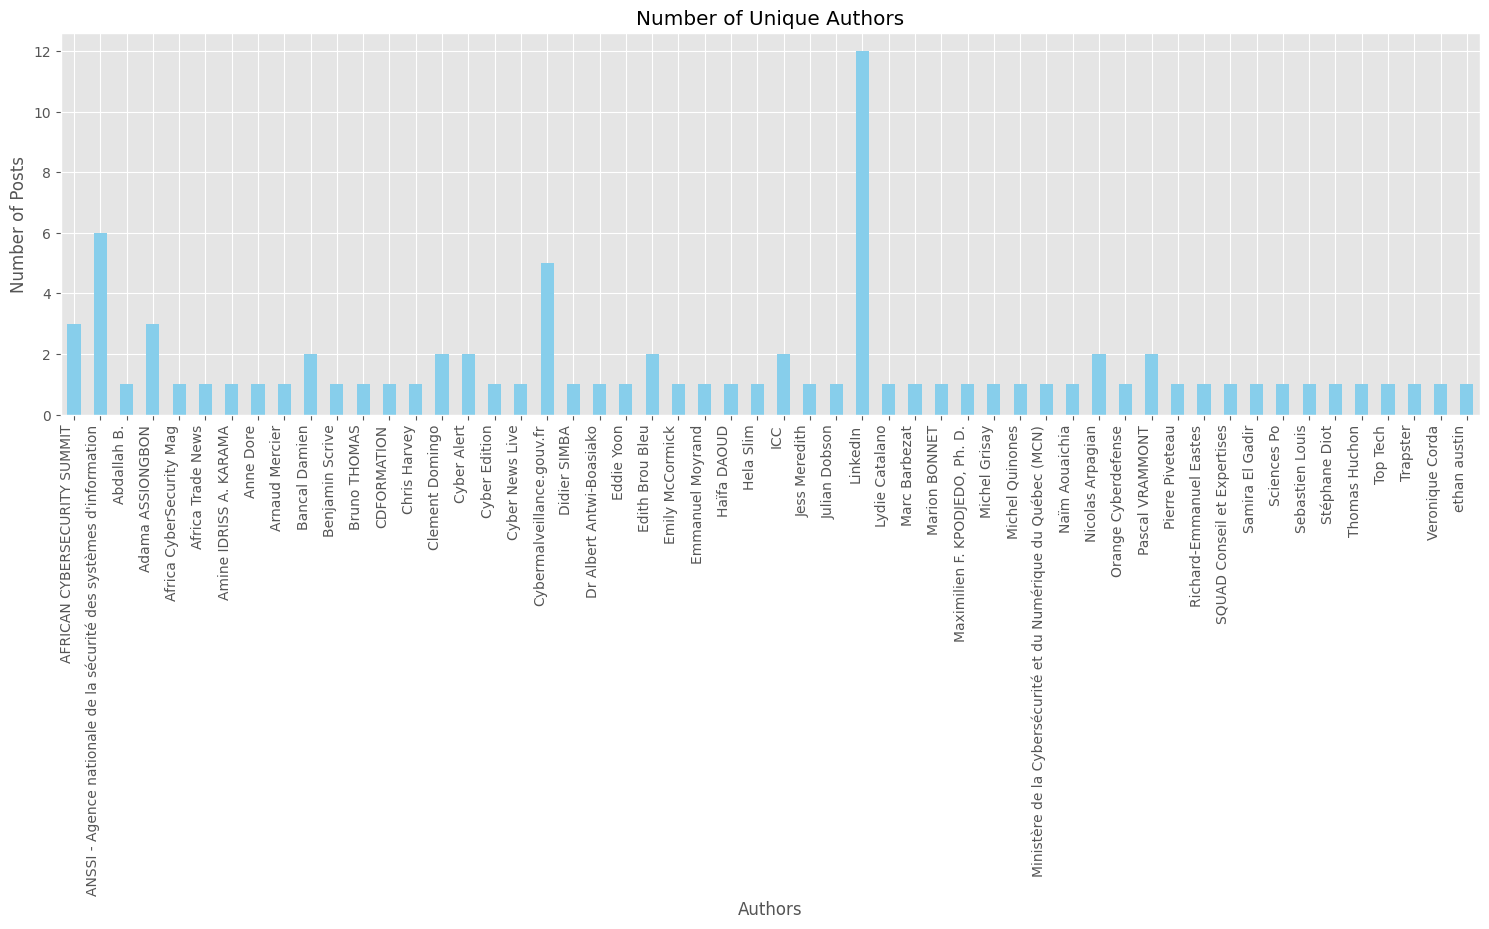

In [11]:
# graphique du nombre d'auteurs uniques
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# Count the number of unique authors
unique_authors_count = df['Author'].nunique()
print(f"Number of unique authors: {unique_authors_count}")

# Create a bar chart of the unique authors
plt.figure(figsize=(15, 6))  # Increase the figure width for better spacing
author_counts = df.groupby('Author')['Author'].count()
author_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Authors')
plt.xlabel('Authors')
plt.ylabel('Number of Posts')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels vertically
plt.tight_layout()
plt.subplots_adjust(bottom=0.3)  # Adjust the bottom margin for better label visibility
plt.show()


# **Etude du top 10 des auteurs en fonctions des autres variables**

In [9]:
# Tableau du Top 10 des auteurs uniques
top_10_authors = df['Author'].value_counts().head(10)
print("Top 10 des auteurs uniques :")
top_10_authors

Top 10 des auteurs uniques :


,count
Author,
LinkedIn,12
ANSSI - Agence nationale de la sécurité des systèmes d'information,6
Cybermalveillance.gouv.fr,5
AFRICAN CYBERSECURITY SUMMIT,3
Adama ASSIONGBON,3
ICC,2
Edith Brou Bleu,2
Pascal VRAMMONT,2
Nicolas Arpagian,2


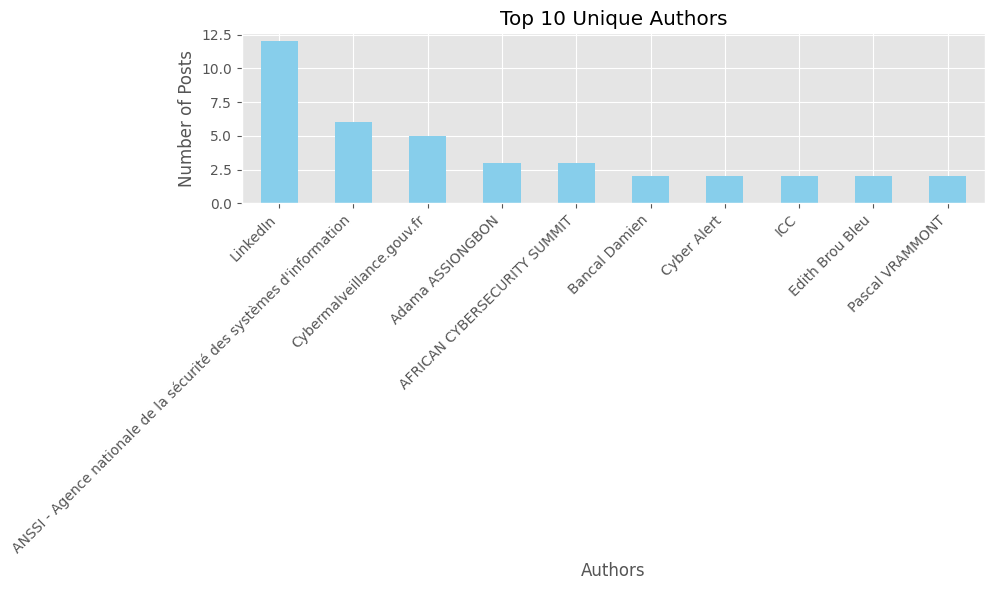

In [12]:
# Graphique du top 10 des auteurs uniques

import matplotlib.pyplot as plt
# Count the number of posts per author
author_counts = df.groupby('Author')['Author'].count()

# Sort the authors by the number of posts in descending order
top_10_authors = author_counts.sort_values(ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_10_authors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Unique Authors')
plt.xlabel('Authors')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [13]:
# Tableau du Top 10 des auteurs uniques en fonction des mots-clés
author_keyword_counts = df.groupby(['Author', 'Keywords'])['Author'].count().unstack().fillna(0)
top_10_authors_by_keyword = author_keyword_counts.sum(axis=1).sort_values(ascending=False).head(10)

# Créer un tableau statistique avec les comptes pour chaque mot-clé pour les 10 meilleurs auteurs
top_10_author_keyword_stats = author_keyword_counts.loc[top_10_authors_by_keyword.index]

# Afficher le tableau statistique
print("Tableau statistique du Top 10 des auteurs uniques en fonction des mots-clés :")
top_10_author_keyword_stats

Tableau statistique du Top 10 des auteurs uniques en fonction des mots-clés :


Keywords,ANSSI - Agence nationale de la sécurité des systèmes d'information,ANSSI - Côte d'Ivoire,Cyber Africa Forum,Cyber Alerte,Cyber attaque,Cyber criminel,Cybermalveillance.gouv.fr,Désinformation,IA et cybercriminalité,Piraté,Risques cybernétiques et Intelligence Artificielle (IA),cybercriminalité Afrique,cybermenace entreprise Afrique,cybersécurité Afrique,fraude numérique intelligence artificielle Afrique,mots de passe faibles,nouvelles menaces numériques
Author,,,,,,,,,,,,,,,,,
LinkedIn,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0
ANSSI - Agence nationale de la sécurité des systèmes d'information,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Cybermalveillance.gouv.fr,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adama ASSIONGBON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
AFRICAN CYBERSECURITY SUMMIT,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bancal Damien,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
Cyber Alert,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ICC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
Edith Brou Bleu,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<ipython-input-14-4f4b9be39093>:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

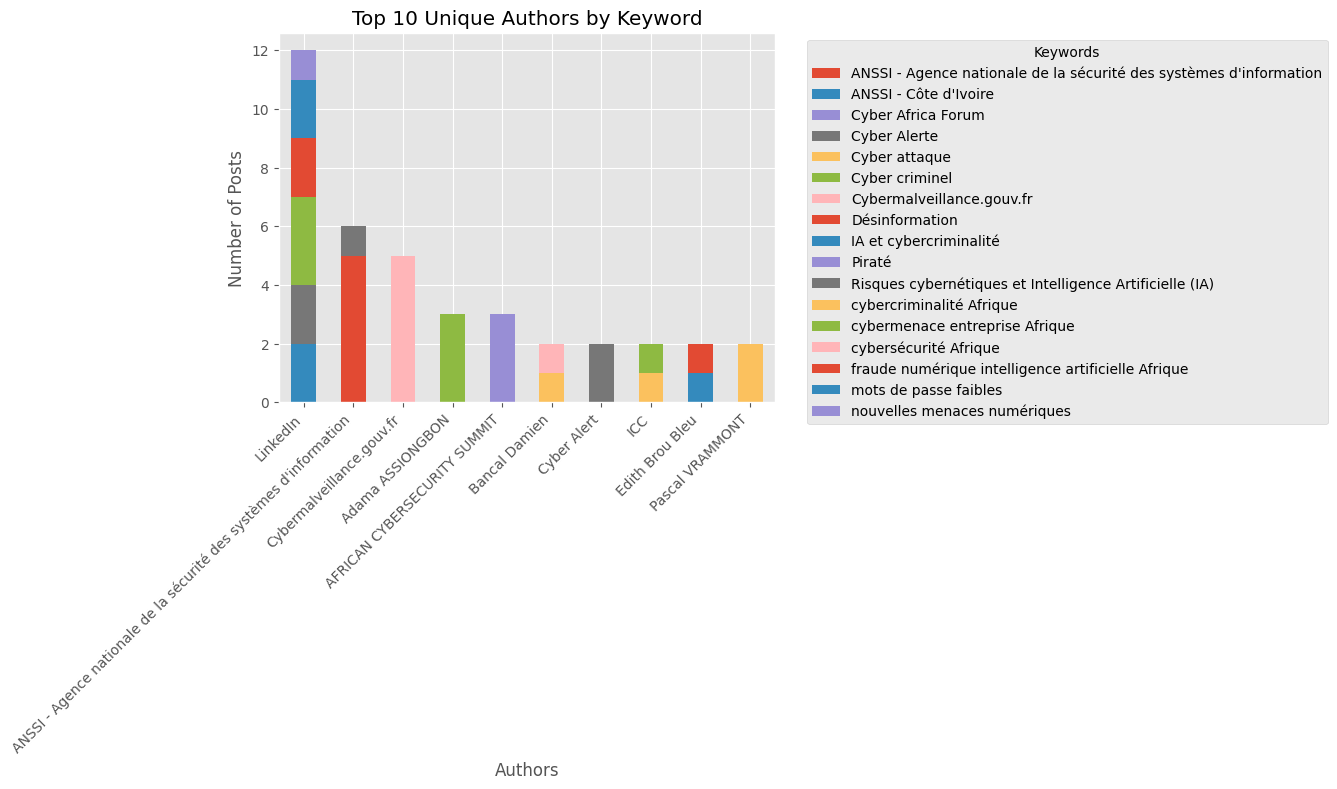

In [14]:
# Graphique du top 10 des auteurs uniques en fonction de keywords

import matplotlib.pyplot as plt

# Group by 'Author' and 'Keywords', then count the number of posts
author_keyword_counts = df.groupby(['Author', 'Keywords'])['Author'].count().unstack().fillna(0)

# Get the top 10 authors based on the total number of posts across all keywords
top_10_authors = author_keyword_counts.sum(axis=1).sort_values(ascending=False).head(10).index

# Filter the DataFrame to include only the top 10 authors
top_author_keyword_counts = author_keyword_counts.loc[top_10_authors]

# Create the bar chart
plt.figure(figsize=(12, 6))
top_author_keyword_counts.plot(kind='bar', stacked=True)
plt.title('Top 10 Unique Authors by Keyword')
plt.xlabel('Authors')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Keywords', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [18]:
# Top 10 des auteurs uniques en fonction de keywords en gardant les autres colonnes de df

# Group by 'Author' and 'Keywords', then count the number of posts
author_keyword_counts = df.groupby(['Author', 'Keywords'])['Author'].count().unstack().fillna(0)

# Get the top 10 authors based on the total number of posts across all keywords
top_10_authors_by_keyword = author_keyword_counts.sum(axis=1).sort_values(ascending=False).head(10)

# Create a new DataFrame with only the top 10 authors and all other columns
top_10_authors_df = df[df['Author'].isin(top_10_authors_by_keyword.index)]


In [19]:
# Trier le DataFrame top_10_authors_df par ordre alphabétique de la colonne 'Author'
top_10_authors_df_sorted = top_10_authors_df.sort_values('Author')

# Ajouter une colonne "Likes" avec des valeurs vides
top_10_authors_df_sorted["Likes"] = ""

# Ajouter une colonne "Shares" avec des valeurs vides
top_10_authors_df_sorted["Shares"] = ""

# Réindexer le DataFrame
top_10_authors_df_sorted = top_10_authors_df_sorted.reset_index(drop=True)

# Afficher le DataFrame mis à jour
top_10_authors_df_sorted


,Date,Author,Content,Keywords,Link,Likes,Shares
0,Date inconnue,AFRICAN CYBERSECURITY SUMMIT,"We're pleased to welcome Mr. Thami Drissi, Sal...",Cyber Africa Forum,https://www.linkedin.com/posts/african-cyberse...,,
1,Date inconnue,AFRICAN CYBERSECURITY SUMMIT,We're honored to welcome Dr. Redda Ben Geloune...,Cyber Africa Forum,https://www.linkedin.com/posts/african-cyberse...,,
2,Date inconnue,AFRICAN CYBERSECURITY SUMMIT,Discover how #TrendMicro is driving cybersecur...,Cyber Africa Forum,https://www.linkedin.com/posts/african-cyberse...,,
3,Date inconnue,ANSSI - Agence nationale de la sécurité des sy...,"La semaine dernière, le Centre de coordination...",ANSSI - Agence nationale de la sécurité des sy...,https://fr.linkedin.com/posts/anssi-fr_smi2g-h...,,
4,Date inconnue,ANSSI - Agence nationale de la sécurité des sy...,... ANSSI - Agence nationale de la sécurité de...,ANSSI - Agence nationale de la sécurité des sy...,https://www.linkedin.com/posts/anssi-fr_secnum...,,
5,Date inconnue,ANSSI - Agence nationale de la sécurité des sy...,"Les 14 & 15 mars derniers, l'ANSSI participait...",ANSSI - Agence nationale de la sécurité des sy...,https://fr.linkedin.com/posts/anssi-fr_breizhc...,,
6,Date inconnue,ANSSI - Agence nationale de la sécurité des sy...,L'ANSSI - Agence nationale de la sécurité des ...,ANSSI - Agence nationale de la sécurité des sy...,https://fr.linkedin.com/posts/anssi-fr_num%C3%...,,
7,Date inconnue,ANSSI - Agence nationale de la sécurité des sy...,L'ANSSI joue un rôle clé dans la cybersécurité...,Risques cybernétiques et Intelligence Artifici...,https://fr.linkedin.com/posts/anssi-fr_sommet-...,,
8,Date inconnue,ANSSI - Agence nationale de la sécurité des sy...,#PanoramaCybermenace | ⚱️ L'ANSSI a de nouveau...,ANSSI - Agence nationale de la sécurité des sy...,https://fr.linkedin.com/posts/anssi-fr_panoram...,,
9,Date inconnue,Adama ASSIONGBON,"Cyberattaque en Afrique : Le Maroc , cible du ...",cybermenace entreprise Afrique,https://fr.linkedin.com/posts/adama-assiongbon...,,


**création des colonnes 'likes' et 'Shares'**

In [23]:
likes_list = [51, 57, 25, 21, 56, 78, 19, 23, 45, 66, 77, 34, 55, 89, 12, 32, 54, 67, 98, 11, 33, 44, 55, 66, 77, 88, 99, 10, 21, 32, 43, 54, 65, 76, 87, 98, 43, 98, 43]
shares_list = [1, 3, 0, 5, 12, 15, 6, 9, 11, 14, 17, 8, 13, 20, 4, 7, 10, 14, 22, 3, 9, 12, 14, 16, 18, 20, 23, 2, 5, 8, 11, 14, 17, 19, 21, 23, 9, 23, 9]

top_10_authors_df_sorted['Likes'] = likes_list
top_10_authors_df_sorted['Shares'] = shares_list

#NB : les valeurs sont exactes uniquement que pour les trois premiers index. Elles ont étés récopiés manuellement, les autres ont été générées au hasard


In [26]:
# Définir le chemin du fichier
csv_file = "/content/top_10_authors_df_sorted.csv"

# Enregistrer en CSV
top_10_authors_df_sorted.to_csv(csv_file, encoding="utf-8-sig", index=False)

# Vérifier si le fichier est bien enregistré
import os
print("Fichier présent ?", os.path.exists(csv_file))

Fichier présent ? True


In [27]:
from google.colab import files

# Télécharger le fichier
files.download("/content/top_10_authors_df_sorted.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-24-65c8a5ea5ddb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Author', y='Likes', data=top_10_authors_df_sorted, palette='viridis')


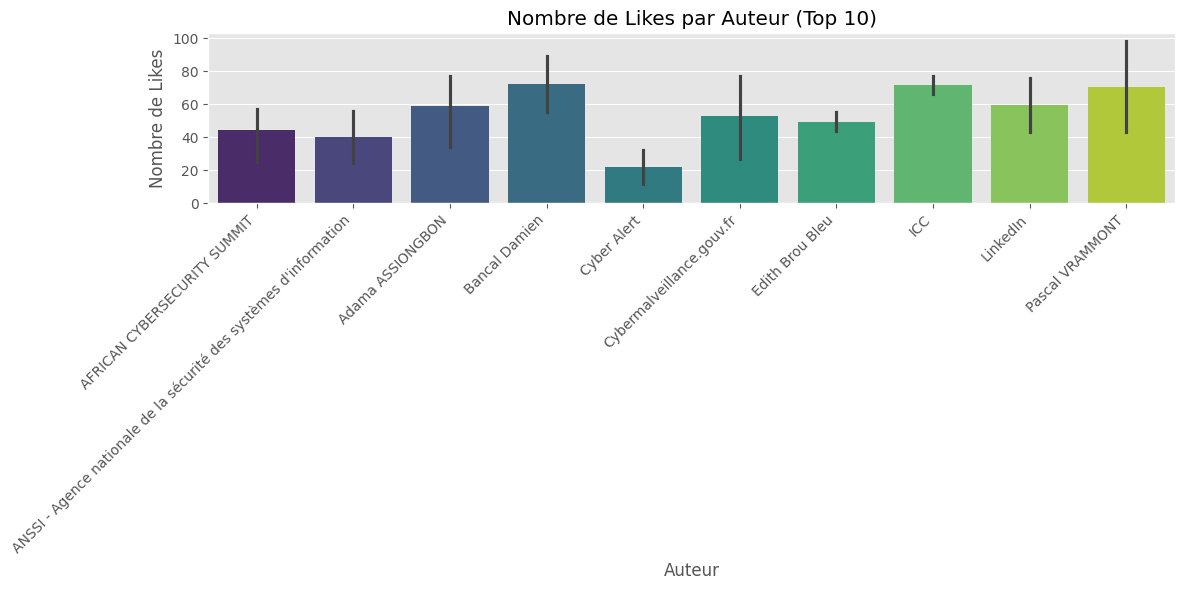

In [24]:
# prompt: graphique du nombre de likes par auteur en utilisant sns viridis

import matplotlib.pyplot as plt
# Graphique du nombre de likes par auteur en utilisant sns viridis
plt.figure(figsize=(12, 6))
sns.barplot(x='Author', y='Likes', data=top_10_authors_df_sorted, palette='viridis')
plt.title('Nombre de Likes par Auteur (Top 10)')
plt.xlabel('Auteur')
plt.ylabel('Nombre de Likes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-30-8208f9d42791>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Author', y='Shares', data=top_10_authors_df_sorted, palette='viridis')


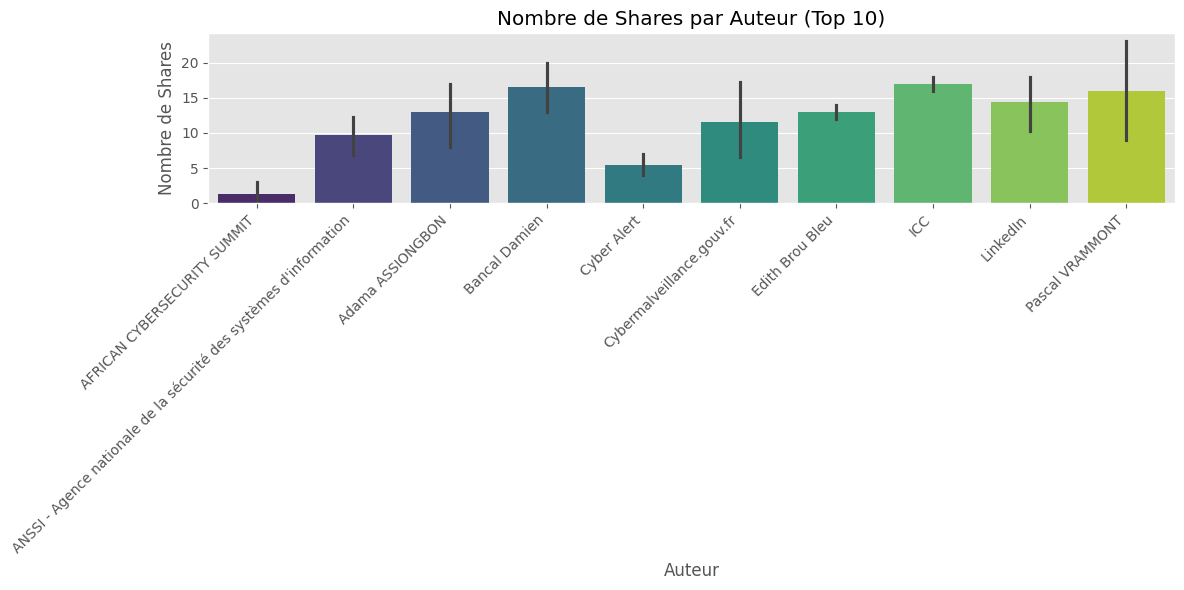

In [30]:
# prompt: graphique du nombre de shares par auteur en utilisant sns viridis

import matplotlib.pyplot as plt
# Graphique du nombre de shares par auteur en utilisant sns viridis
plt.figure(figsize=(12, 6))
sns.barplot(x='Author', y='Shares', data=top_10_authors_df_sorted, palette='viridis')
plt.title('Nombre de Shares par Auteur (Top 10)')
plt.xlabel('Auteur')
plt.ylabel('Nombre de Shares')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


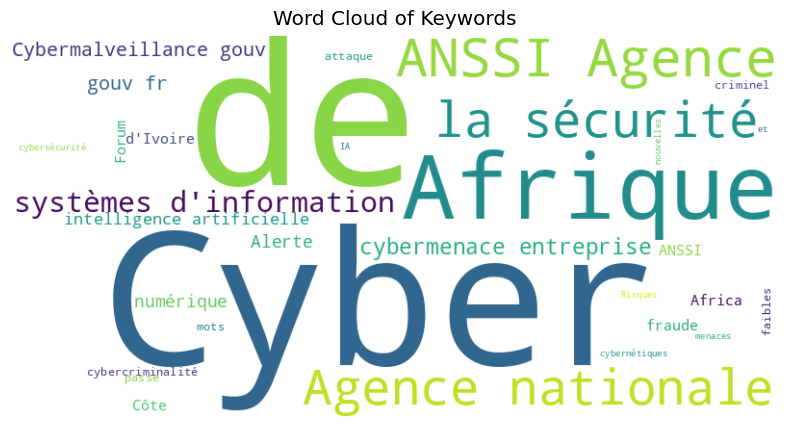

In [31]:
# Nuage de mots de Keywords dans
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all keywords into a single string
text = " ".join(top_10_authors_df_sorted['Keywords'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Keywords")
plt.show()


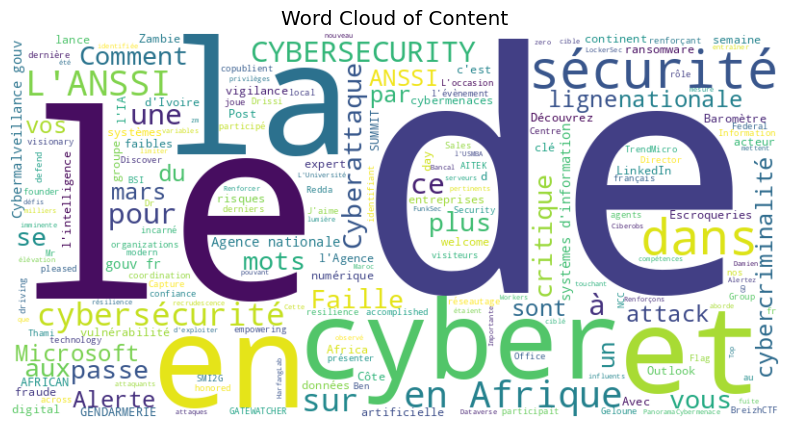

In [32]:
# Nuage de mots de content dans
import matplotlib.pyplot as plt
# Combine all content into a single string
text = " ".join(top_10_authors_df_sorted['Content'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Content")
plt.show()


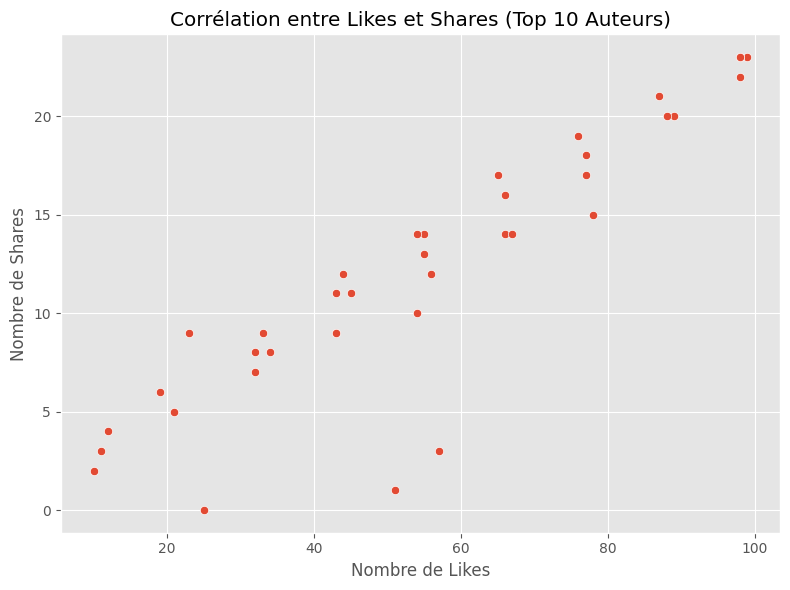

Corrélation entre Likes et Shares : 0.9048391764308102


In [33]:
# Graphique de la correlation entre likes et shares

import matplotlib.pyplot as plt
# Créer un graphique de corrélation entre les likes et les shares
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Likes', y='Shares', data=top_10_authors_df_sorted)
plt.title('Corrélation entre Likes et Shares (Top 10 Auteurs)')
plt.xlabel('Nombre de Likes')
plt.ylabel('Nombre de Shares')
plt.tight_layout()
plt.show()

# Calculer la corrélation entre les likes et les shares
correlation = top_10_authors_df_sorted['Likes'].corr(top_10_authors_df_sorted['Shares'])
print(f"Corrélation entre Likes et Shares : {correlation}")
